## merge 59530 and ISM

Filename 和 001.standard_QC_intersection.tsv 的 isoform_id 交集数量: 20799
Filename 和 002.extra_NMD_intersection.tsv 的 isoform_id 交集数量: 16934
Filename 和 proteome_plddt_length.tsv 中 plddt>=70 的交集数量: 0
001.standard_QC_intersection.tsv有pdb且>=70，和Human proteome: 36503
002.extra_NMD_intersection.tsv有pdb且>=70，和Human proteome: 32638


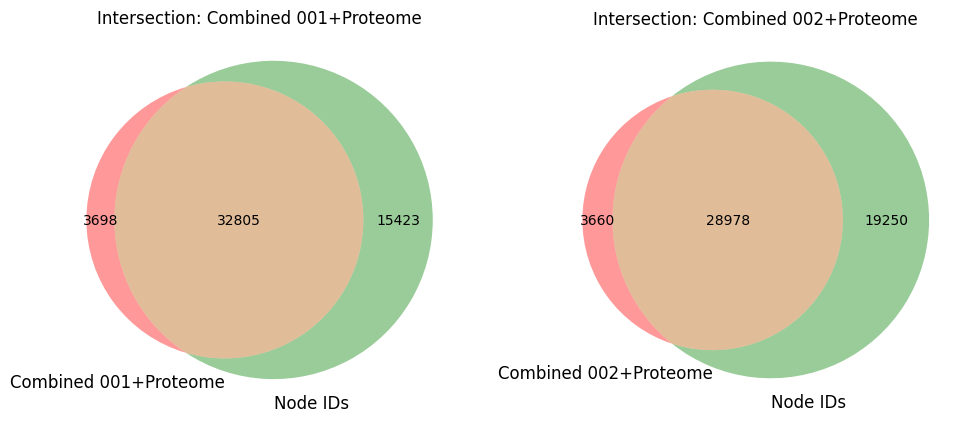

In [2]:
import pandas as pd
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

# 定义文件路径
file1 = "/cpu2/jiang_tao/13.3Disoform/14_3DisoGalaxy_reinvent_20241217/04_protein_structure/01_predicted_protein_structure/02_length_plddt/004.key_iso_plddt_over70_38016.tsv"
file2 = "/cpu2/jiang_tao/13.3Disoform/14_3DisoGalaxy_reinvent_20241217/03_ORF_calling_structure/001.standard_QC_intersection.tsv"
file3 = "/cpu2/jiang_tao/13.3Disoform/14_3DisoGalaxy_reinvent_20241217/03_ORF_calling_structure/002.extra_NMD_intersection.tsv"
file4 = "/cpu2/jiang_tao/13.3Disoform/04_pdb_predict_prepare_info/00_all_predict_pdb_structure/01_human_proteome/003.proteome_plddt_length.tsv"
file5 = "/cpu3/jiang_tao/02_jiang_tao/02_3Disoform_part2/14_web_cosmo/01_data/008.node_09tmscore_classifcation_label_gene_symbol_cluter_uniprotAnno_subtype_nodeColor_nodeSize.tsv"

# 读取文件
filename_ids = pd.read_csv(file1, sep='\t')['Filename']
isoform_ids_1 = pd.read_csv(file2, sep='\t')['isoform_id']
isoform_ids_2 = pd.read_csv(file3, sep='\t')['isoform_id']
proteome_df = pd.read_csv(file4, sep='\t')
node_df = pd.read_csv(file5, sep='\t')
node_ids = node_df.iloc[:, 0]  # 读取 file5 的第一列

# 过滤掉 plddt 小于 70 的行
filtered_proteome_ids = proteome_df[proteome_df['plddt'] >= 70]['Filename']

# 计算交集数量
intersection_1 = set(filename_ids) & set(isoform_ids_1)
intersection_2 = set(filename_ids) & set(isoform_ids_2)
proteome_filtered_intersection = set(filtered_proteome_ids) & set(filename_ids)

# 计算合集
combined_1 = intersection_1 | set(filtered_proteome_ids)
combined_2 = intersection_2 | set(filtered_proteome_ids)

# 打印每个交集的数量
print(f"Filename 和 001.standard_QC_intersection.tsv 的 isoform_id 交集数量: {len(intersection_1)}")
print(f"Filename 和 002.extra_NMD_intersection.tsv 的 isoform_id 交集数量: {len(intersection_2)}")
print(f"Filename 和 proteome_plddt_length.tsv 中 plddt>=70 的交集数量: {len(proteome_filtered_intersection)}")

# 计算加和总数
intersection_1_total = len(intersection_1)
intersection_2_total = len(intersection_2)
proteome_total = len(proteome_filtered_intersection)
intersection_total = intersection_1_total + intersection_2_total + proteome_total

print(f"001.standard_QC_intersection.tsv有pdb且>=70，和Human proteome: {len(combined_1)}")
print(f"002.extra_NMD_intersection.tsv有pdb且>=70，和Human proteome: {len(combined_2)}")

# 提取差集并保存到新文件
unique_to_008_1 = node_df[~node_df.iloc[:, 0].isin(combined_1)]
unique_to_008_2 = node_df[~node_df.iloc[:, 0].isin(combined_2)]

unique_to_008_1.to_csv("unique_to_008_from_001.tsv", sep='\t', index=False)
unique_to_008_2.to_csv("unique_to_008_from_002.tsv", sep='\t', index=False)

# 绘制 Venn 图
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
venn2([set(combined_1), set(node_ids)], ('Combined 001+Proteome', 'Node IDs'))
plt.title('Intersection: Combined 001+Proteome')

plt.subplot(1, 2, 2)
venn2([set(combined_2), set(node_ids)], ('Combined 002+Proteome', 'Node IDs'))
plt.title('Intersection: Combined 002+Proteome')

plt.tight_layout()
plt.savefig("intersection_venn_diagrams.png")
plt.show()



First 5 IDs from FASTA file:
TALONT000296405
TALONT000301803
TALONT000307663
TALONT000276655
TALONT000280096
Total FASTA IDs: 87401

Set sizes:
File1 (Detected ORF): 99376
File2_1 (Standard QC): 90929
File2_2 (Extra NMD): 90397
File3 (ORF calling): 87401
File4 (pLDDT > 70): 38015

Intersection counts:
Filename ∩ Standard QC: 34365
Filename ∩ Extra NMD: 29481


/tmp/ipykernel_328186/4135168316.py:167: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


AttributeError: 'Legend' object has no attribute 'set_fontsize'

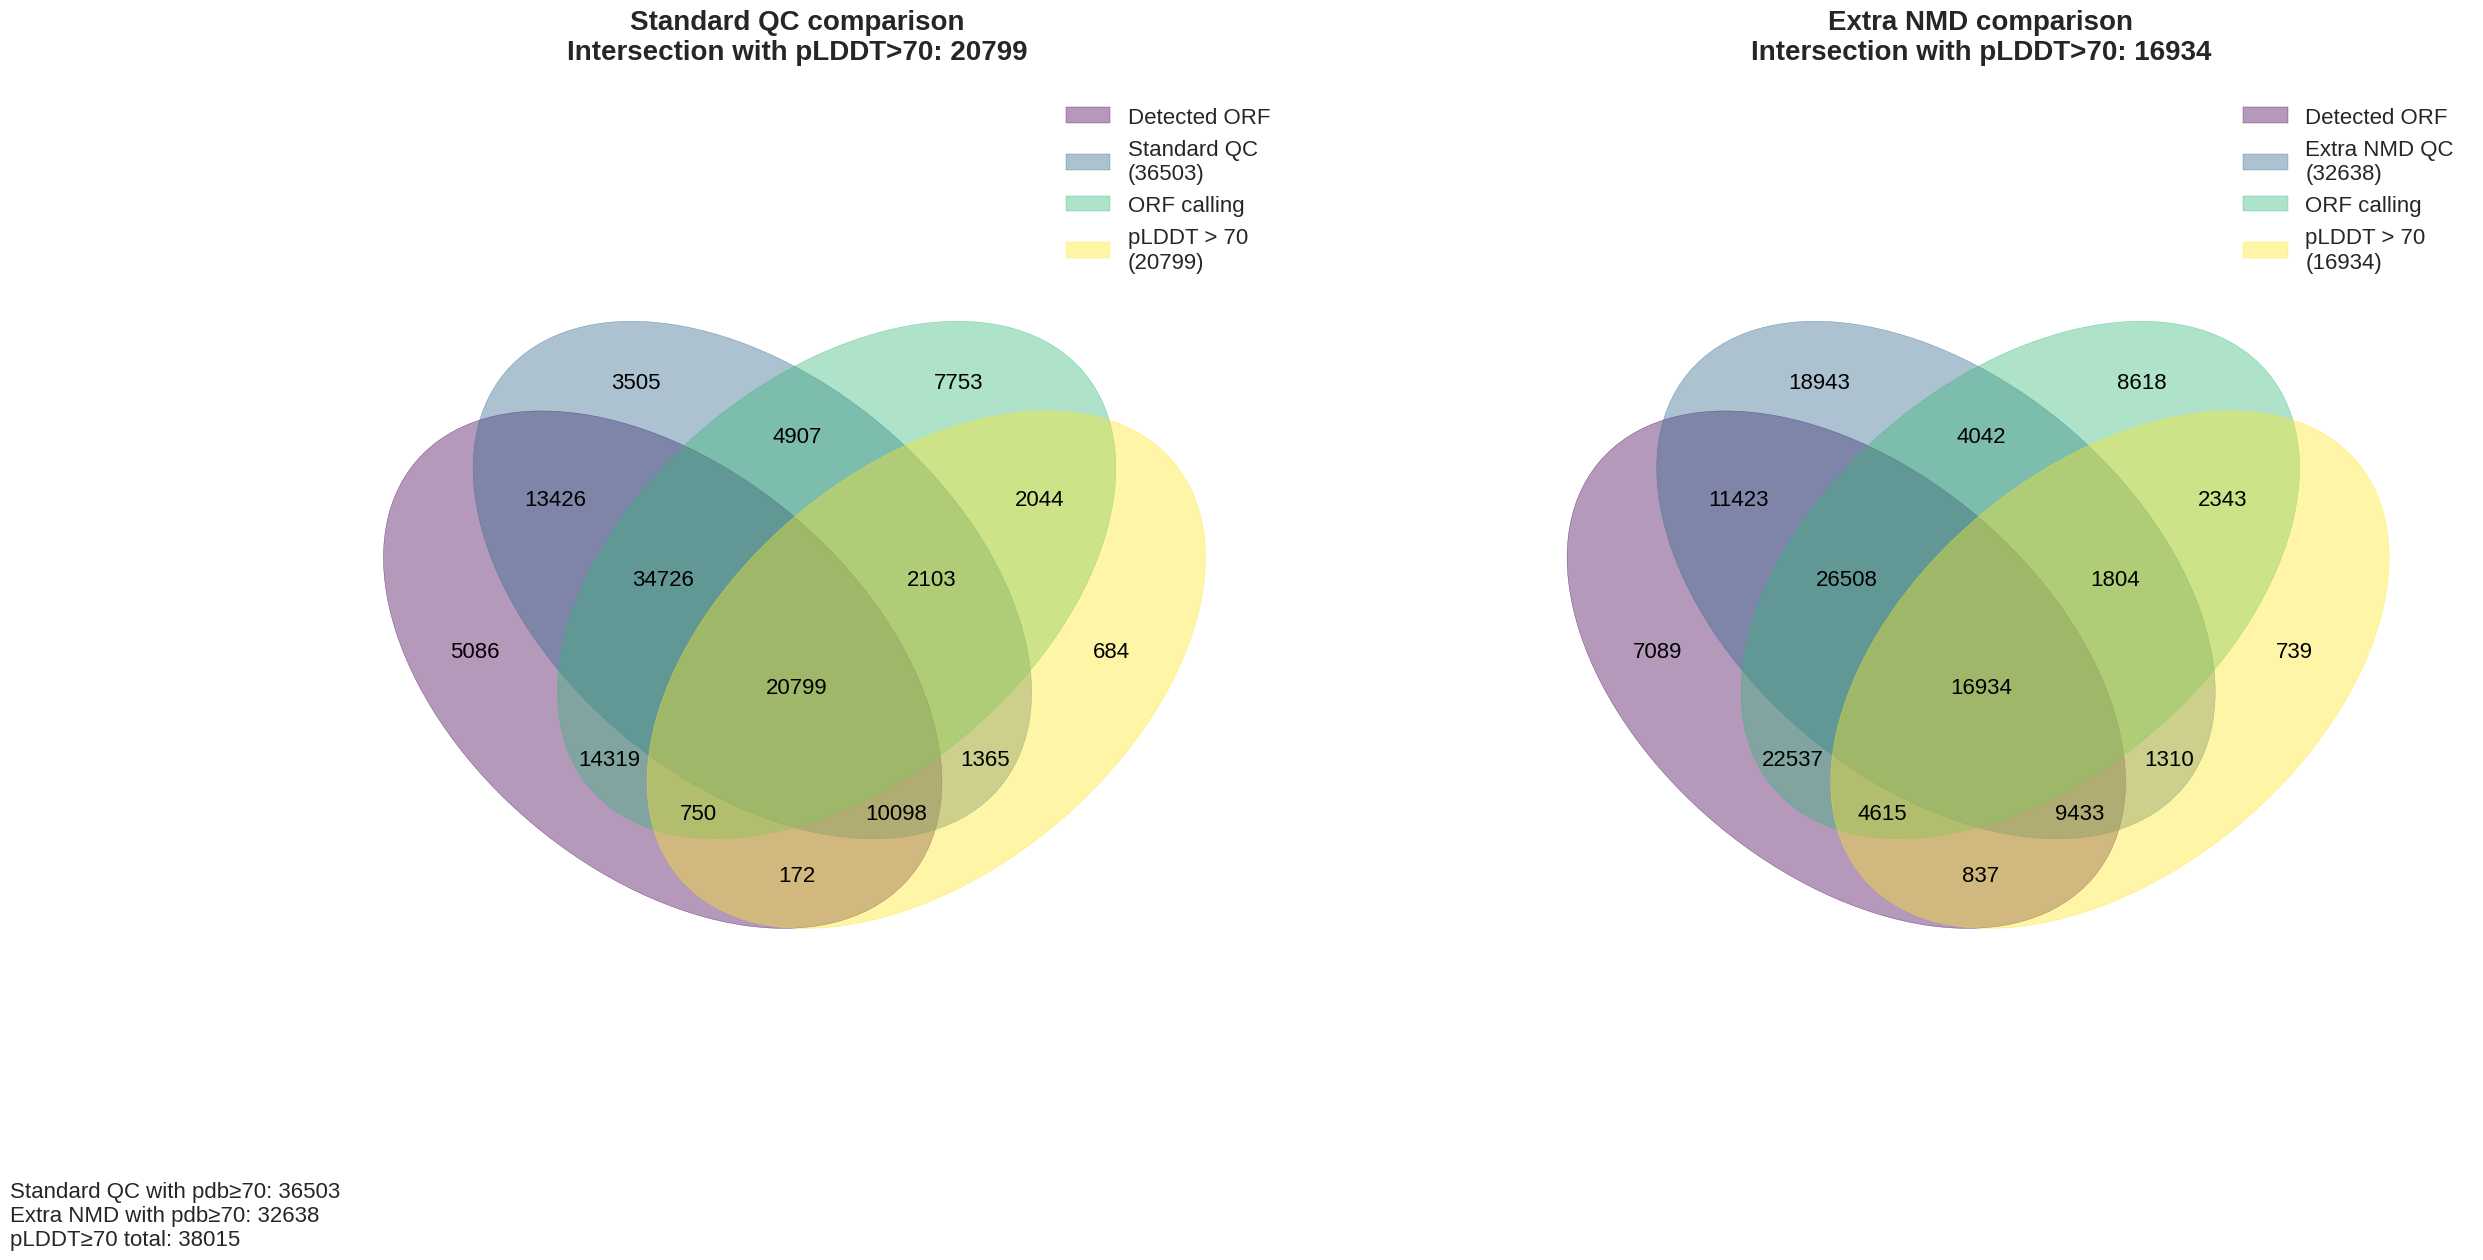

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from venn import venn
import matplotlib.colors as mcolors

def read_fasta_ids(fasta_path):
    """Read IDs from FASTA file"""
    ids = set()
    with open(fasta_path, 'r') as f:
        for line in f:
            if line.startswith('>'):
                # Split by tab and take first element, remove '>'
                id_ = line.strip()[1:].split('\t')[0]
                ids.add(id_)
    # Print first few IDs for verification
    print("\nFirst 5 IDs from FASTA file:")
    for id_ in list(ids)[:5]:
        print(id_)
    print(f"Total FASTA IDs: {len(ids)}")
    return ids

def read_file_ids(file_path, id_column='isoform_id', separator='\t'):
    """Read IDs from TSV file"""
    df = pd.read_csv(file_path, sep=separator, low_memory=False)
    if id_column == "transcript_id":
        ids = set()
        for id_str in df[id_column].dropna():
            ids.update(id_str.split(","))
        return ids
    return set(df[id_column].dropna())

def create_sets_dict(sets, labels):
    """Create dictionary for venn diagram"""
    return dict(zip(labels, sets))

def main():
    # File paths
    file1_path = "/cpu2/jiang_tao/13.3Disoform/14_3DisoGalaxy_reinvent_20241217/02_translatome_riboseq/03_cal_merge_A132_A133/001.A132_loose_detect_ORF_id.tsv"
    file2_path_1 = "/cpu2/jiang_tao/13.3Disoform/03_filter_parameter/01_filter_proteome/mmseqs2_longestORF_proteome/02_reference_proteome/orfanage/filtering_transcriptome/021.filtered_no_AFDB_sqanti3_classifcation_90928.tsv"
    file2_path_2 = "/cpu2/jiang_tao/13.3Disoform/14_3DisoGalaxy_reinvent_20241217/01_transcriptome_QC/filtering_transcriptome/021.brca_classifcation_QC_sampeCount_loc_symbol_meanPSI_DR_deltaPSI_mane_drug_target_drug_FC_org_func_singleton.tsv"
    file3_path = "/cpu2/jiang_tao/13.3Disoform/14_3DisoGalaxy_reinvent_20241217/03_ORF_calling_structure/04_delete_dup/007.no_proteome_great100_one_longests_noDup_cleanID.fasta"
    file4_path = "/cpu2/jiang_tao/13.3Disoform/14_3DisoGalaxy_reinvent_20241217/04_protein_structure/01_predicted_protein_structure/02_length_plddt/004.key_iso_plddt_over70_38016.tsv"
    
    # Read data
    file1_ids = read_file_ids(file1_path, "transcript_id")
    file2_ids_1 = read_file_ids(file2_path_1)
    file2_ids_2 = read_file_ids(file2_path_2)
    file3_ids = read_fasta_ids(file3_path)
    file4_ids = read_file_ids(file4_path, "Filename")
    
    # Print set sizes
    print("\nSet sizes:")
    print(f"File1 (Detected ORF): {len(file1_ids)}")
    print(f"File2_1 (Standard QC): {len(file2_ids_1)}")
    print(f"File2_2 (Extra NMD): {len(file2_ids_2)}")
    print(f"File3 (ORF calling): {len(file3_ids)}")
    print(f"File4 (pLDDT > 70): {len(file4_ids)}")
    
    # Calculate all intersections
    standard_intersect = file4_ids & file2_ids_1
    extra_nmd_intersect = file4_ids & file2_ids_2
    
    # Print intersection sizes
    print("\nIntersection counts:")
    print(f"Filename ∩ Standard QC: {len(standard_intersect)}")
    print(f"Filename ∩ Extra NMD: {len(extra_nmd_intersect)}")
    print(f"Filename ∩ pLDDT≥70 with Human proteome: {len(file4_ids)}")
    print(f"Standard QC with pdb≥70 and Human proteome: {len(file2_ids_1 & file4_ids)}")
    print(f"Extra NMD with pdb≥70 and Human proteome: {len(file2_ids_2 & file4_ids)}")
    
    # Create figure
    plt.style.use('seaborn')
    fig, axes = plt.subplots(1, 2, figsize=(24, 12))
    fig.patch.set_facecolor('white')
    
    # Create sets dictionaries
    standard_sets = create_sets_dict(
        [file1_ids, file2_ids_1, file3_ids, file4_ids],
        ['Detected ORF', 'Standard QC\n(36503)', 'ORF calling', 'pLDDT > 70\n(20799)']
    )
    
    extra_nmd_sets = create_sets_dict(
        [file1_ids, file2_ids_2, file3_ids, file4_ids],
        ['Detected ORF', 'Extra NMD QC\n(32638)', 'ORF calling', 'pLDDT > 70\n(16934)']
    )
    
    # Create Venn diagrams
    venn(standard_sets, ax=axes[0], fontsize=10)
    venn(extra_nmd_sets, ax=axes[1], fontsize=10)
    
    # Customize titles
    axes[0].set_title('Standard QC comparison\nIntersection with pLDDT>70: 20799', 
                     pad=20, fontsize=14, fontweight='bold')
    axes[1].set_title('Extra NMD comparison\nIntersection with pLDDT>70: 16934', 
                     pad=20, fontsize=14, fontweight='bold')
    import pandas as pd
import matplotlib.pyplot as plt
from venn import venn
import matplotlib.colors as mcolors

def read_fasta_ids(fasta_path):
    """Read IDs from FASTA file"""
    ids = set()
    with open(fasta_path, 'r') as f:
        for line in f:
            if line.startswith('>'):
                # Split by tab and take first element, remove '>'
                id_ = line.strip()[1:].split('\t')[0]
                ids.add(id_)
    # Print first few IDs for verification
    print("\nFirst 5 IDs from FASTA file:")
    for id_ in list(ids)[:5]:
        print(id_)
    print(f"Total FASTA IDs: {len(ids)}")
    return ids

def read_file_ids(file_path, id_column='isoform_id', separator='\t'):
    """Read IDs from TSV file"""
    df = pd.read_csv(file_path, sep=separator, low_memory=False)
    if id_column == "transcript_id":
        ids = set()
        for id_str in df[id_column].dropna():
            ids.update(id_str.split(","))
        return ids
    return set(df[id_column].dropna())

def create_sets_dict(sets, labels):
    """Create dictionary for venn diagram"""
    return dict(zip(labels, sets))

def main():
    # 增加全局字体大小
    plt.rcParams.update({'font.size': 14})
    
    # File paths
    file1_path = "/cpu2/jiang_tao/13.3Disoform/14_3DisoGalaxy_reinvent_20241217/02_translatome_riboseq/03_cal_merge_A132_A133/001.A132_loose_detect_ORF_id.tsv"
    file2_path_1 = "/cpu2/jiang_tao/13.3Disoform/03_filter_parameter/01_filter_proteome/mmseqs2_longestORF_proteome/02_reference_proteome/orfanage/filtering_transcriptome/021.filtered_no_AFDB_sqanti3_classifcation_90928.tsv"
    file2_path_2 = "/cpu2/jiang_tao/13.3Disoform/14_3DisoGalaxy_reinvent_20241217/01_transcriptome_QC/filtering_transcriptome/021.brca_classifcation_QC_sampeCount_loc_symbol_meanPSI_DR_deltaPSI_mane_drug_target_drug_FC_org_func_singleton.tsv"
    file3_path = "/cpu2/jiang_tao/13.3Disoform/14_3DisoGalaxy_reinvent_20241217/03_ORF_calling_structure/04_delete_dup/007.no_proteome_great100_one_longests_noDup_cleanID.fasta"
    file4_path = "/cpu2/jiang_tao/13.3Disoform/14_3DisoGalaxy_reinvent_20241217/04_protein_structure/01_predicted_protein_structure/02_length_plddt/004.key_iso_plddt_over70_38016.tsv"
    
    # Read data
    file1_ids = read_file_ids(file1_path, "transcript_id")
    file2_ids_1 = read_file_ids(file2_path_1)
    file2_ids_2 = read_file_ids(file2_path_2)
    file3_ids = read_fasta_ids(file3_path)
    file4_ids = read_file_ids(file4_path, "Filename")
    
    # Print set sizes
    print("\nSet sizes:")
    print(f"File1 (Detected ORF): {len(file1_ids)}")
    print(f"File2_1 (Standard QC): {len(file2_ids_1)}")
    print(f"File2_2 (Extra NMD): {len(file2_ids_2)}")
    print(f"File3 (ORF calling): {len(file3_ids)}")
    print(f"File4 (pLDDT > 70): {len(file4_ids)}")
    
    # Calculate all intersections
    standard_intersect = file4_ids & file2_ids_1
    extra_nmd_intersect = file4_ids & file2_ids_2
    
    # Print intersection sizes
    print("\nIntersection counts:")
    print(f"Filename ∩ Standard QC: {len(standard_intersect)}")
    print(f"Filename ∩ Extra NMD: {len(extra_nmd_intersect)}")
    
    # Create figure with larger size
    plt.style.use('seaborn')
    fig, axes = plt.subplots(1, 2, figsize=(28, 14))
    fig.patch.set_facecolor('white')
    
    # Create sets dictionaries with larger font labels
    standard_sets = create_sets_dict(
        [file1_ids, file2_ids_1, file3_ids, file4_ids],
        ['Detected ORF', 'Standard QC\n(36503)', 'ORF calling', 'pLDDT > 70\n(20799)']
    )
    
    extra_nmd_sets = create_sets_dict(
        [file1_ids, file2_ids_2, file3_ids, file4_ids],
        ['Detected ORF', 'Extra NMD QC\n(32638)', 'ORF calling', 'pLDDT > 70\n(16934)']
    )
    
    # Create Venn diagrams with larger fonts
    venn(standard_sets, ax=axes[0], fontsize=16)
    venn(extra_nmd_sets, ax=axes[1], fontsize=16)
    
    # Customize titles with larger fonts
    axes[0].set_title('Standard QC comparison\nIntersection with pLDDT>70: 20799', 
                     pad=20, fontsize=20, fontweight='bold')
    axes[1].set_title('Extra NMD comparison\nIntersection with pLDDT>70: 16934', 
                     pad=20, fontsize=20, fontweight='bold')
    
    # Add annotation with intersection information (larger font)
    info_text = (
        f'Standard QC with pdb≥70: 36503\n'
        f'Extra NMD with pdb≥70: 32638\n'
        f'pLDDT≥70 total: {len(file4_ids)}'
    )
    fig.text(0.02, 0.02, info_text, fontsize=16)
    
    # 设置图例字体大小
    for ax in axes:
        if ax.get_legend() is not None:
            ax.get_legend().set_fontsize(16)
    
    # Adjust layout and save with higher resolution
    plt.tight_layout(pad=3.0)
    plt.savefig('quadruple_venn_diagrams.png', dpi=300, bbox_inches='tight')
    print("\nVenn diagram saved as 'quadruple_venn_diagrams.png'")

if __name__ == "__main__":
    main()
    # Add annotation with intersection information
    info_text = (
        f'Standard QC with pdb≥70: 36503\n'
        f'Extra NMD with pdb≥70: 32638\n'
        f'pLDDT≥70 total: {len(file4_ids)}'
    )
    fig.text(0.02, 0.02, info_text, fontsize=10)
    
    # Adjust layout and save
    plt.tight_layout(pad=3.0)
    plt.savefig('quadruple_venn_diagrams.png', dpi=300, bbox_inches='tight')
    print("\nVenn diagram saved as 'quadruple_venn_diagrams.png'")

if __name__ == "__main__":
    main()

001.standard_QC_intersection.tsv有pdb且>=70，和Human proteome: 36503
002.extra_NMD_intersection.tsv有pdb且>=70，和Human proteome: 32638

In [13]:
15639+20799

36438

In [14]:
15639+16934

32573